In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msn

## Reading Data

In [2]:
df = pd.read_csv(
    r"D:\self_development\coding\python\DATACAMP_data_science\numpy_pandas_learn+datacamp\projects\nobel_prize\data\nobel.csv"
)

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [4]:
df.shape

(1000, 18)

In [5]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

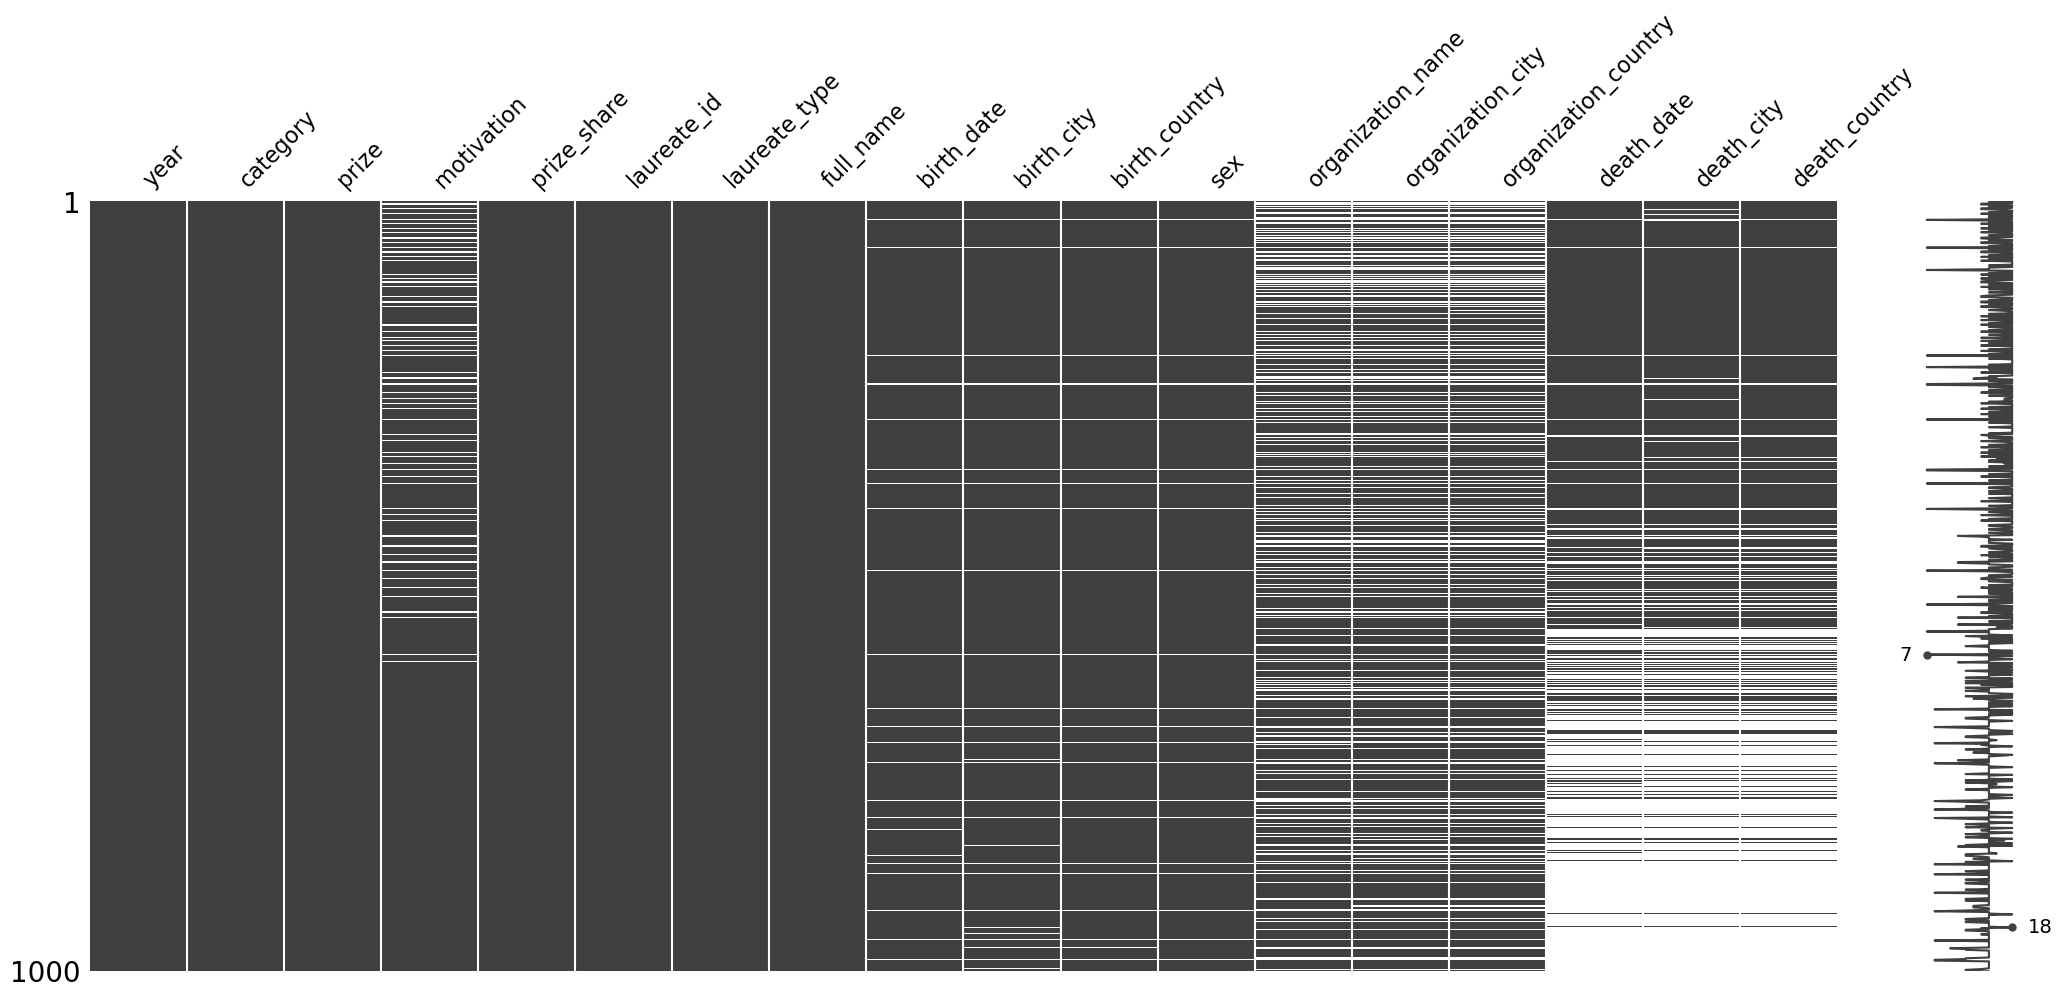

In [6]:
msn.matrix(df);

## Most commonly awarded gender and birth country

In [7]:
missing_sex = df[df['sex'].isna()]
complete_sex = df[~df['sex'].isna()]

print('missing sex count: '+ str(missing_sex.shape[0]), end='\n\n')
print(missing_sex.isna().sum())

missing sex count: 30

year                     0
category                 0
prize                    0
motivation              16
prize_share              0
laureate_id              0
laureate_type            0
full_name                0
birth_date              30
birth_city              30
birth_country           30
sex                     30
organization_name       30
organization_city       30
organization_country    30
death_date              30
death_city              30
death_country           30
dtype: int64


it can be concluded that the datapoints having no sex info have no birth_date to death-country entry at all. Thus for gender related study: we can ignore those datapoints.

In [8]:
df_sex = df[~df['sex'].isna()]

### TOP GENDER

In [9]:
df_sex['sex'].value_counts()

sex
Male      905
Female     65
Name: count, dtype: int64

In [10]:
top_gender = 'Male'

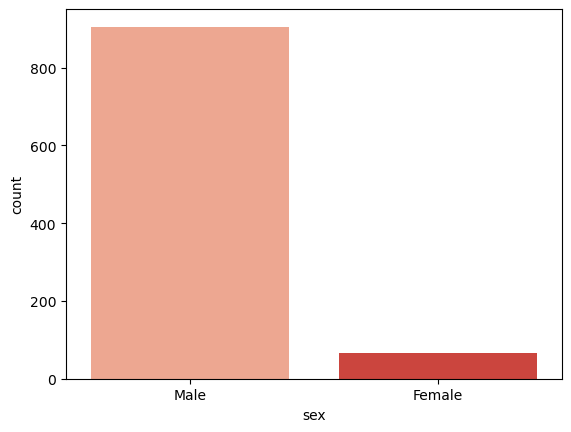

In [11]:
sns.countplot(
    x="sex",
    data=df_sex,
    palette="Reds",
)
# plt.xticks(rotation=90)
plt.show()

The graph clearly shows 800+ awards were made to male candidates whereas female count is below 100.

### TOP COUNTRY

In [12]:
missing_birth_country = df[df['birth_country'].isna()]
complete_birth_country = df[~df['birth_country'].isna()]
print('missing birth_country count: '+ str(missing_birth_country.shape[0]), end='\n\n')
print(missing_birth_country.isna().sum())

missing birth_country count: 31

year                     0
category                 0
prize                    0
motivation              16
prize_share              0
laureate_id              0
laureate_type            0
full_name                0
birth_date              30
birth_city              31
birth_country           31
sex                     30
organization_name       31
organization_city       31
organization_country    31
death_date              31
death_city              31
death_country           31
dtype: int64


31 missing missing_birth_country out of which 30 have half of the entries empty as seen previously. What's the extra 1 datapoint? Just out of curiosity.

In [13]:
missing_birth_country_1 = missing_birth_country[~missing_birth_country['sex'].isna()]
missing_birth_country_1.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
969,2021,Literature,The Nobel Prize in Literature 2021,"""for his uncompromising and compassionate pene...",1/1,1004,Individual,Abdulrazak Gurnah,1948-00-00,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
missing_birth_country_1.isna().sum()

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              1
birth_country           1
sex                     0
organization_name       1
organization_city       1
organization_country    1
death_date              1
death_city              1
death_country           1
dtype: int64

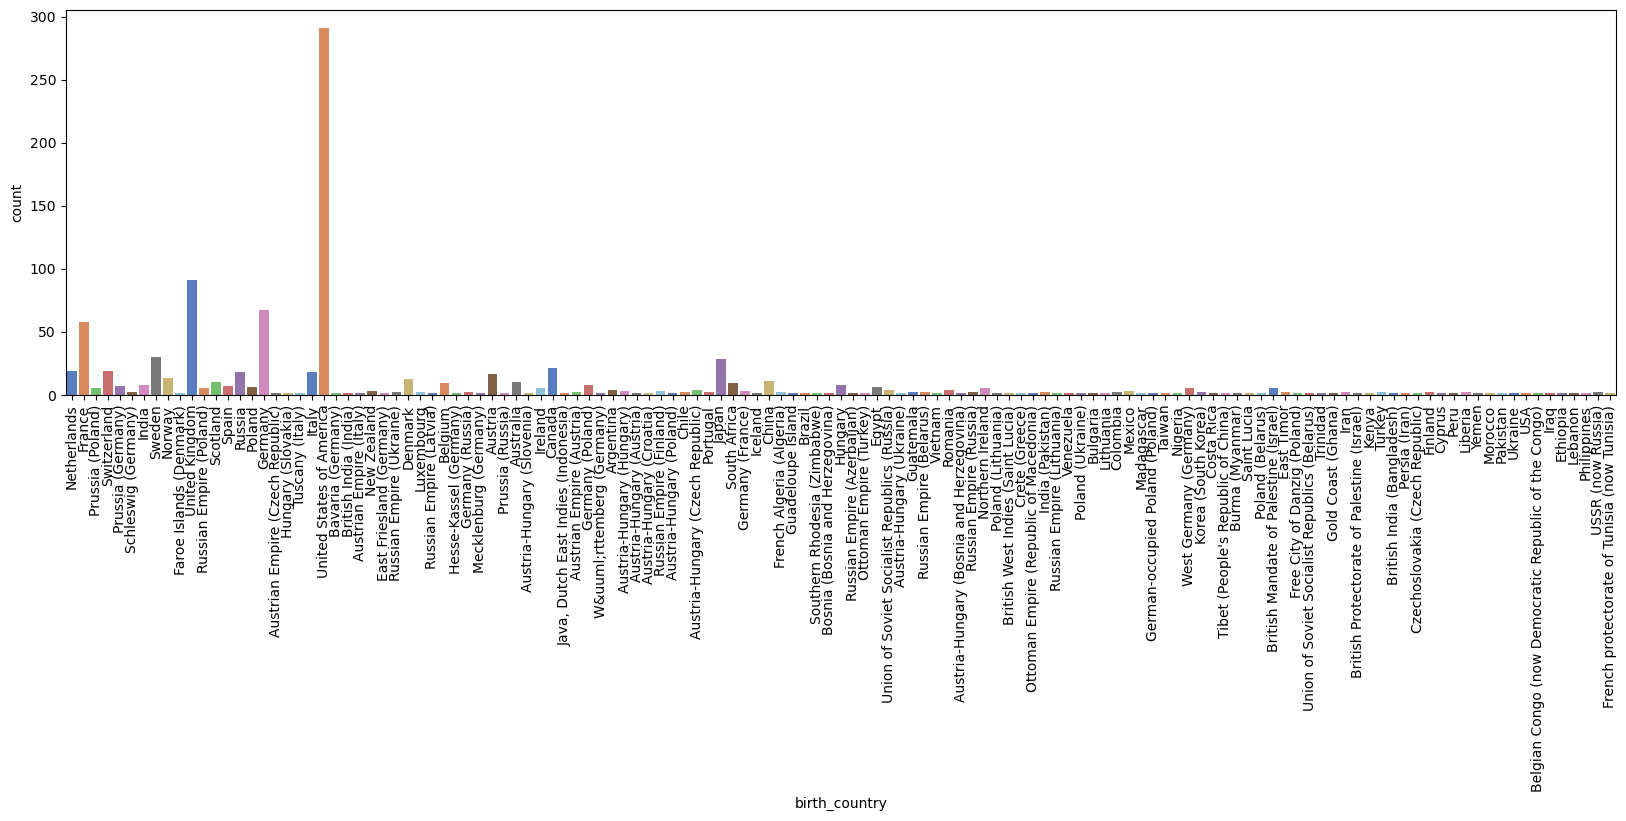

In [15]:
fig, ax = plt.subplots()
g = sns.countplot(x="birth_country", data=complete_birth_country, palette='muted')
plt.xticks(rotation=90)
fig.set_size_inches([20, 5])
plt.show()

From the graph, there are so many countries enlisted for different noble winners. Among Them, USA has the most noble prize winners. UK is at second and Germany standing third. 

In [16]:
country_count = complete_birth_country['birth_country'].value_counts()
print(country_count)

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 129, dtype: int64


In [17]:
complete_birth_country['birth_country'].value_counts().describe()

count    129.000000
mean       7.511628
std       27.789981
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      291.000000
Name: count, dtype: float64

As its seen, 75% countries have less or equal 4 nobel prizes.

In [18]:
count = complete_birth_country['birth_country'].value_counts()

In [19]:
top25_country = complete_birth_country[complete_birth_country['birth_country'].isin(count[count > 4].index)]
top25_country.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [20]:
top25_country['birth_country'].value_counts().head()

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: count, dtype: int64

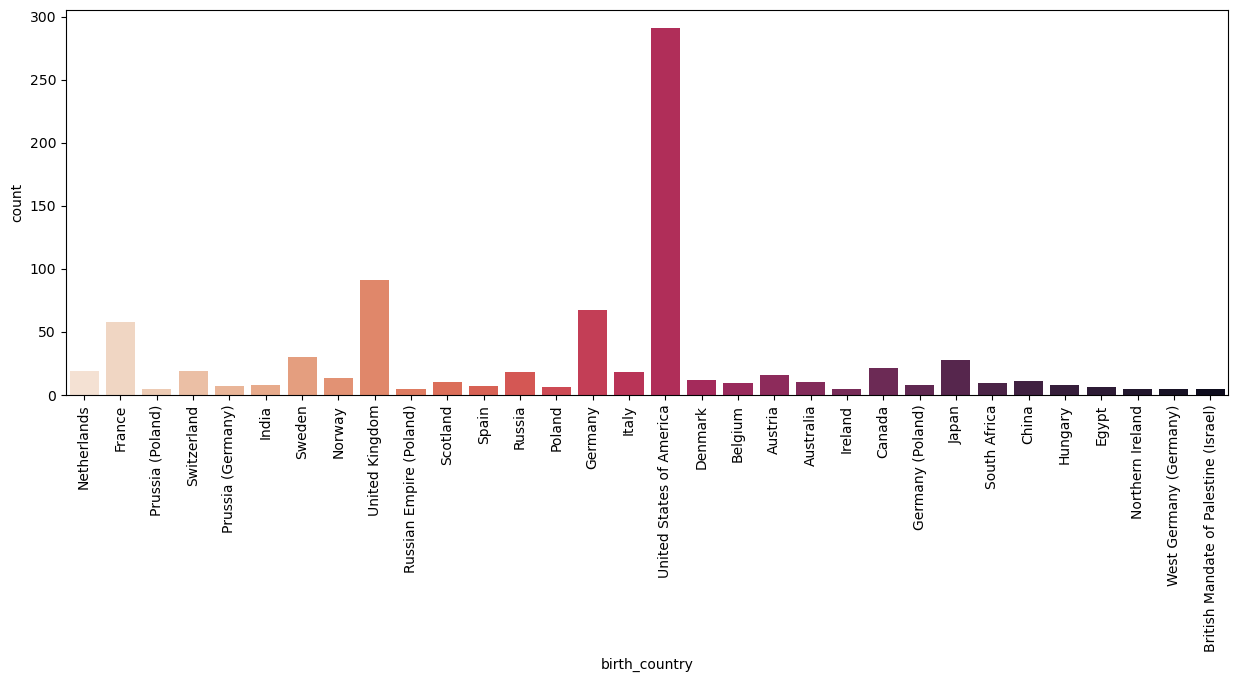

In [21]:
fig, ax = plt.subplots()
g = sns.countplot(x="birth_country", data=top25_country, palette='rocket_r')
plt.xticks(rotation=90)
fig.set_size_inches([15, 5])
plt.show()

In [22]:
top_country = "United States of America"

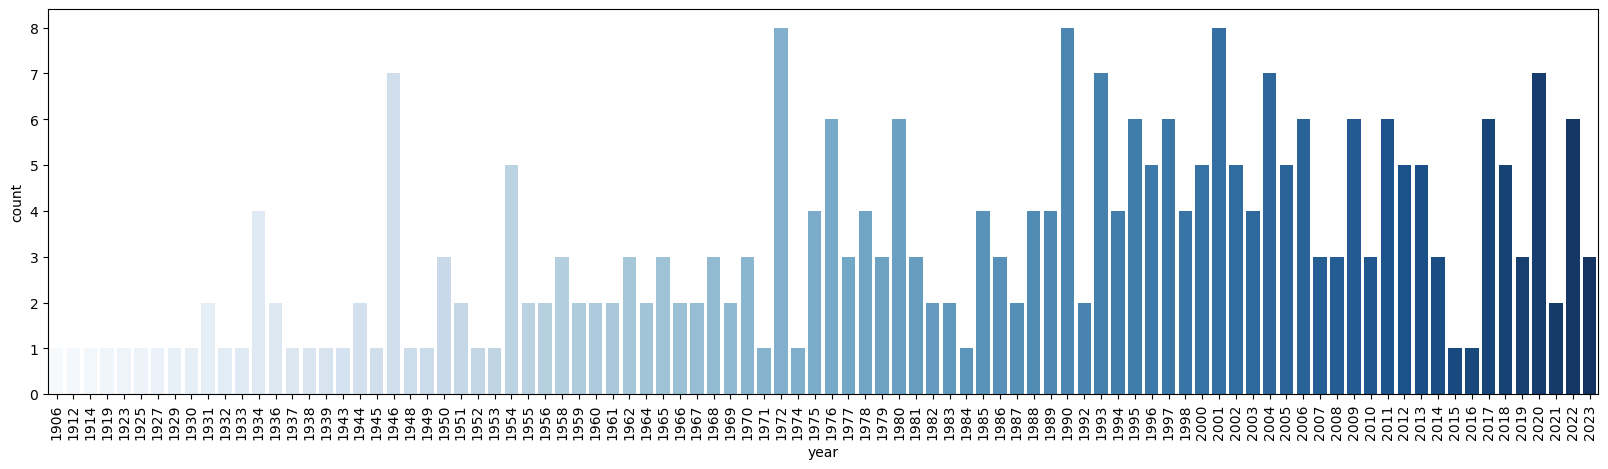

In [23]:
fig, ax = plt.subplots()
g = sns.countplot(x='year', data=top25_country[top25_country['birth_country'] == top_country], palette='Blues')
plt.xticks(rotation=90)
fig.set_size_inches([20, 5])
plt.show()

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


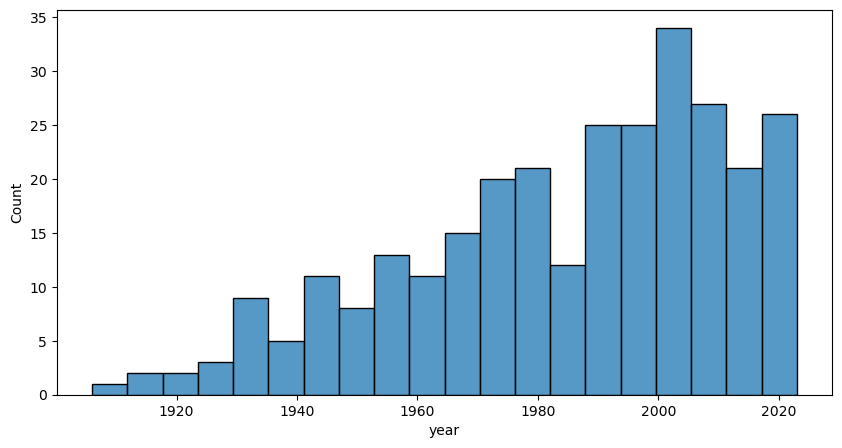

In [24]:
fig, ax = plt.subplots()
g = sns.histplot(x='year', data=top25_country[top25_country['birth_country'] == top_country], bins=20)
# plt.xticks(rotation=90)
fig.set_size_inches([10, 5])
plt.show()

These above 2 plots show the rise of nobel laureates from USA. Significant jump can be seen after 1940 and the curve keep rising till late decade of 10's.

In [25]:
df['USA_born'] = df['birth_country'] == top_country
df[df['birth_country'] == top_country].head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America,True
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America,True
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America,True
95,1919,Peace,The Nobel Peace Prize 1919,NaN,1/1,483,Individual,Thomas Woodrow Wilson,1856-12-28,"Staunton, VA",United States of America,Male,NaN,NaN,NaN,1924-02-03,"Washington, DC",United States of America,True
117,1923,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America,True


In [26]:
df['decade'] = (np.floor(df['year']/10)*10).astype('int64')

In [27]:
df[df['birth_country'] == top_country]['decade'].head()

35     1900
72     1910
79     1910
95     1910
117    1920
Name: decade, dtype: int64

In [28]:
prop_usa_winners = df.groupby('decade', as_index=False)['USA_born'].agg('mean')
prop_usa_winners

,decade,USA_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [29]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

In [30]:
sns.set_theme('notebook')

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


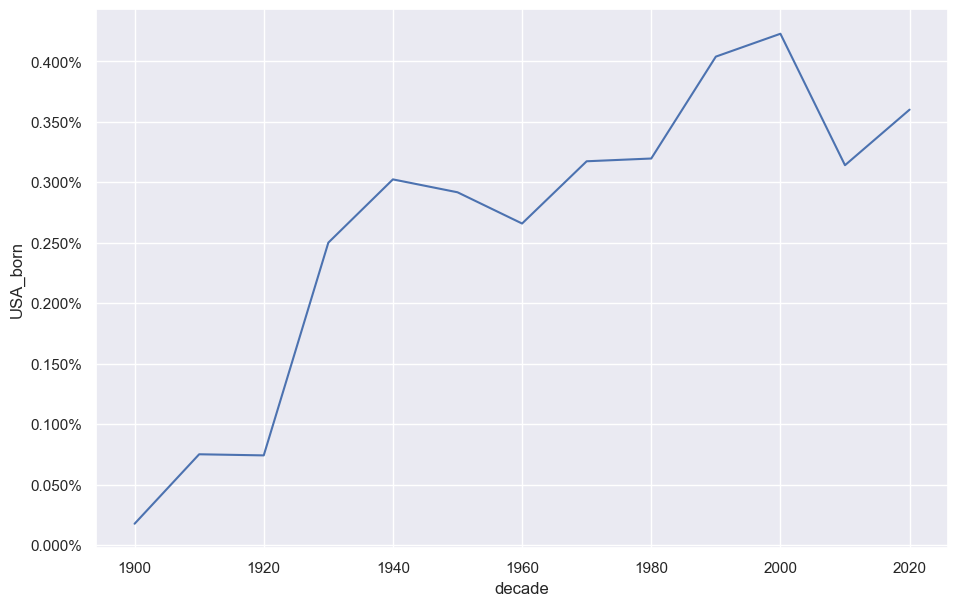

In [31]:
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x='decade', y='USA_born', data=prop_usa_winners, errorbar=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## First Woman winning Noble

In [32]:
# WRONG INFO! ITS NOT FEMALE
df.nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900


In [33]:
fem_df = df[df['sex'] == 'Female'].sort_values('year', ascending=True)

In [34]:
fem_df.head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900


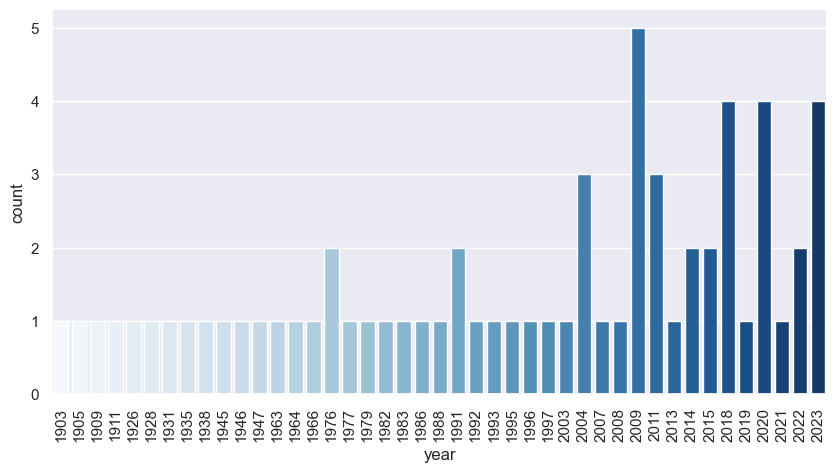

In [35]:
fig, ax = plt.subplots()
sns.countplot(x="year", data=fem_df, palette='Blues')
plt.xticks(rotation=90)
fig.set_size_inches([10, 5])
plt.show()

The graph shows the first female noble prize winner came on 1903, two years after the prize was launched. She was Polish Madam Marie Curie, winning Noble Prize on Physics. <br>
From 1903, till 2023 three times happened where 4 female candidates won the prize in the same year: 2018, 2020 and 2023. The maximum number of awards in the same year as female candidates is 5 in 2009.

In [36]:
first_fem = fem_df.iloc[0,:]
print(first_fem)

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

### FIRST WOMAN & CATEGORY

In [37]:
first_woman_name = first_fem.full_name
first_woman_category = first_fem.category

## Decade with the highest proportion of US born winners

In [38]:
US_df = df[df["birth_country"] == "United States of America"]
US_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America,True,1900
72,1912,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America,True,1910
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America,True,1910
95,1919,Peace,The Nobel Peace Prize 1919,NaN,1/1,483,Individual,Thomas Woodrow Wilson,1856-12-28,"Staunton, VA",United States of America,Male,NaN,NaN,NaN,1924-02-03,"Washington, DC",United States of America,True,1910
117,1923,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America,True,1920


g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


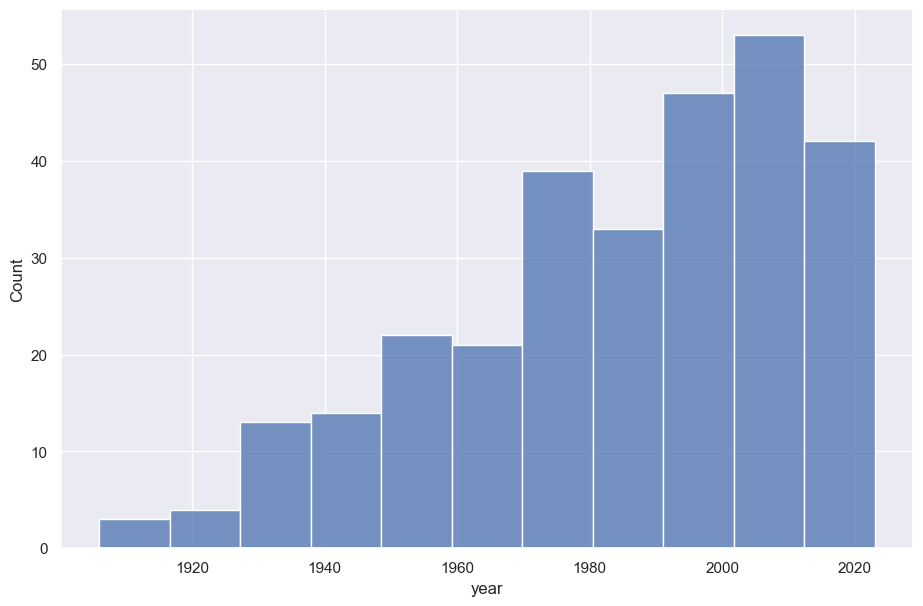

In [39]:
sns.histplot(x='year', data=US_df)
plt.show()

In [40]:
US_df['year'].describe() # ranging from 1906 to 2023. 

count     291.000000
mean     1984.920962
std        26.523066
min      1906.000000
25%      1968.000000
50%      1990.000000
75%      2006.000000
max      2023.000000
Name: year, dtype: float64

In [41]:
import math
quartiles = US_df['year'].quantile([.25, .75])
IQR = quartiles[.75] - quartiles[.25]
n = US_df.shape[0]
bin_value = math.ceil(2 * (IQR/n**(1/3))) # freedman diaconis rule for optimum robust bin value
bin_value


12

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


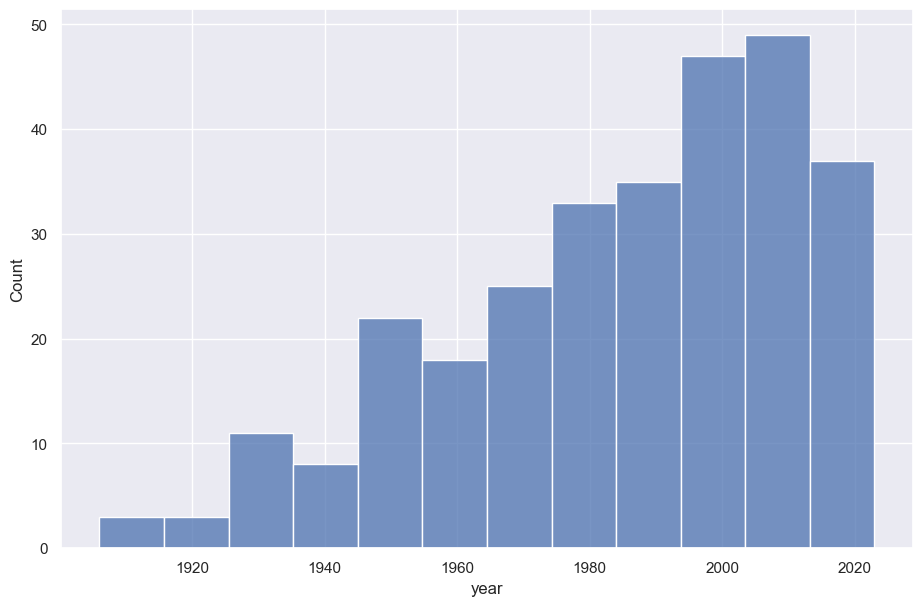

In [42]:
sns.histplot(x="year", data=US_df, bins=bin_value)
plt.show()

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


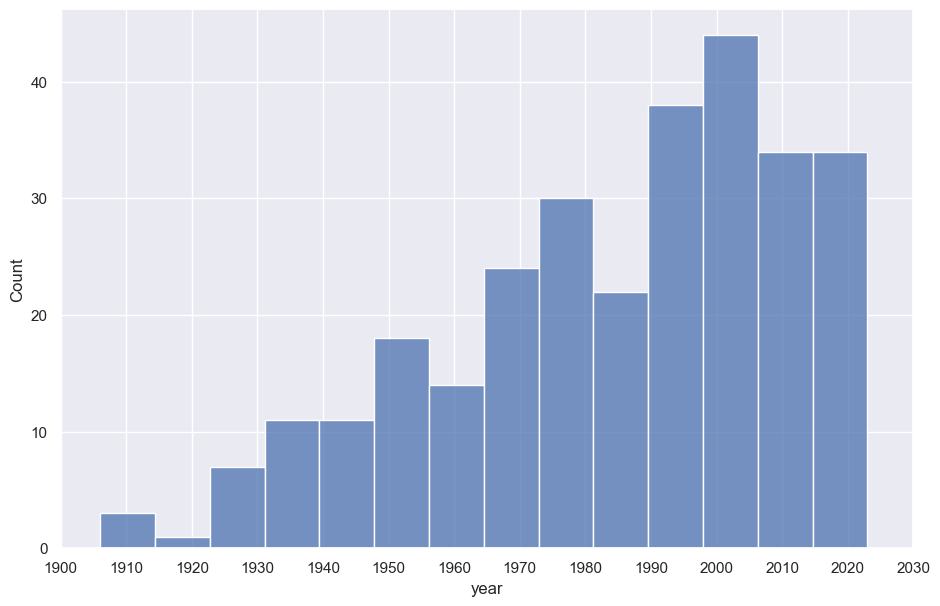

In [43]:
g = sns.histplot(x="year", data=US_df, bins=len(np.arange(1900, 2040, 10)))
plt.xticks(ticks=np.arange(1900, 2040, 10), labels=np.arange(1900, 2040, 10))
plt.show()

In [44]:
np.arange(1900, 2040, 10)

array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
       2010, 2020, 2030])

grouping by names and filtering that so that only names with multiple wins are included. 

In [45]:
df.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960


In [46]:
df['birth_year'] = pd.to_datetime(df['birth_date'].str[:4], format='%Y')
df['year'] = df['year'].astype('int', errors='ignore')

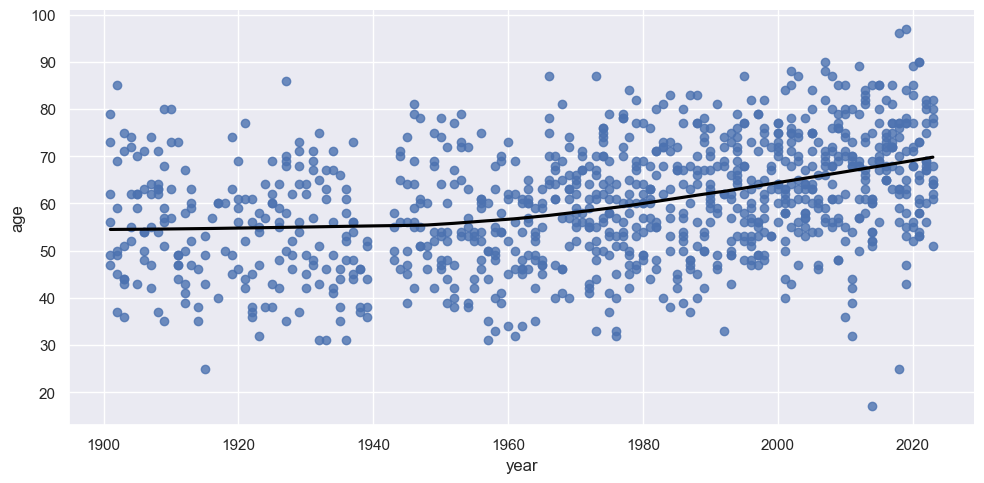

In [47]:
# Calculating the age of Nobel Prize winners
df['age'] = df['year'] - df['birth_year'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=df, lowess=True, aspect=2, line_kws={'color' : 'black'})
plt.show()

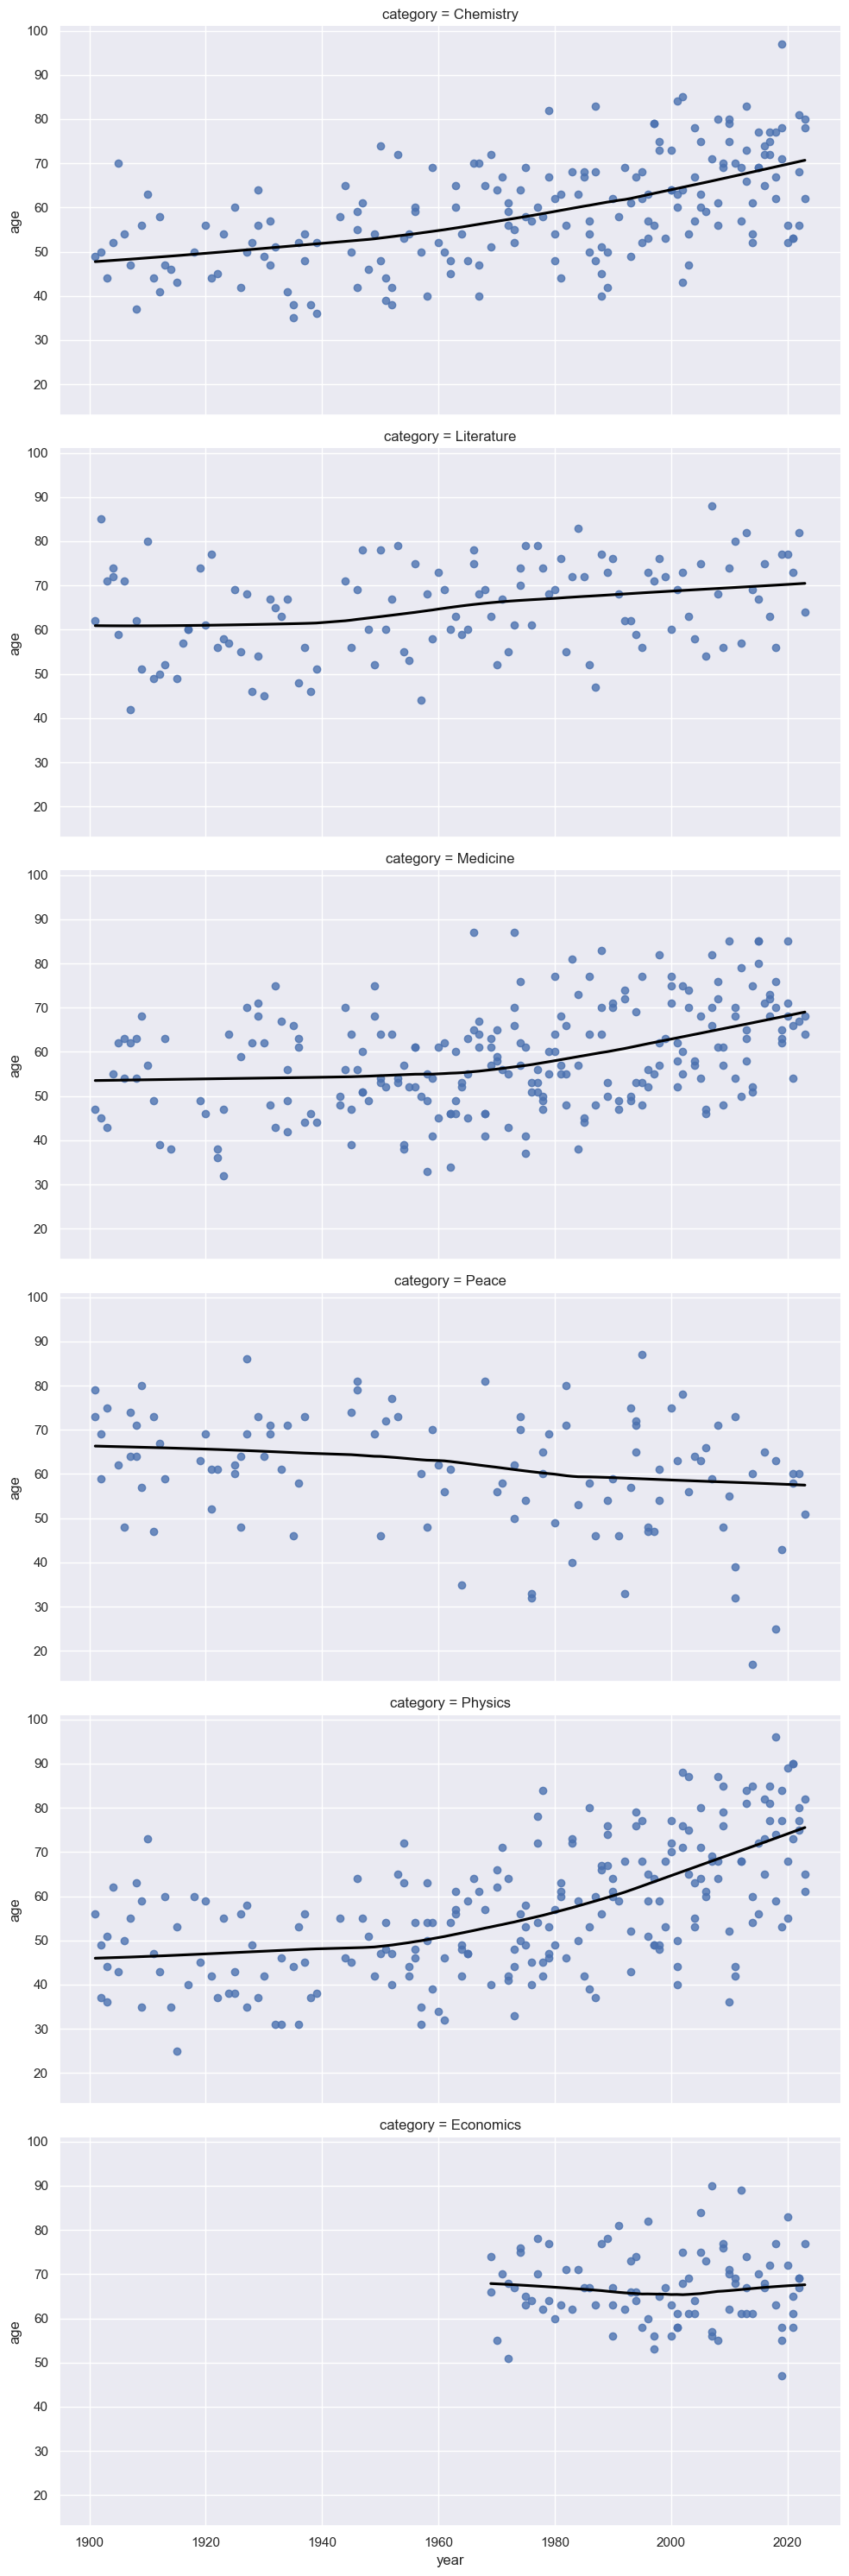

In [48]:
sns.lmplot(x='year', y='age', row='category', data=df, lowess=True, aspect=2, line_kws={'color' : 'black'})
plt.show()

In [49]:
a = df.nsmallest(1, 'age')
str(a['full_name']).split('\n')[0].split('    ')[1]

'Malala Yousafzai'